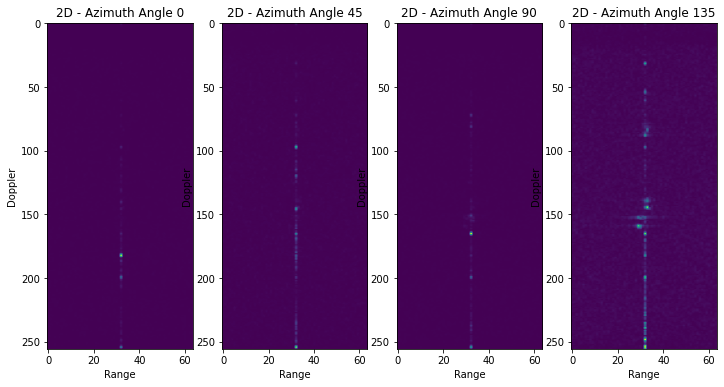

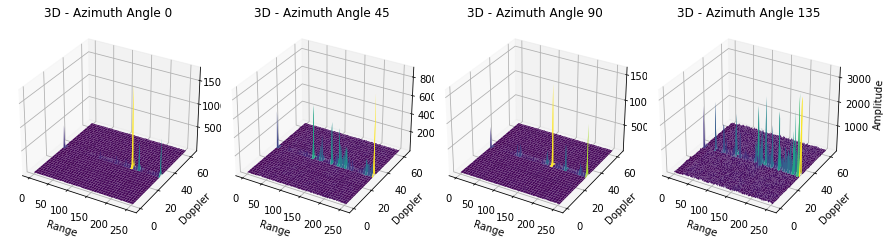

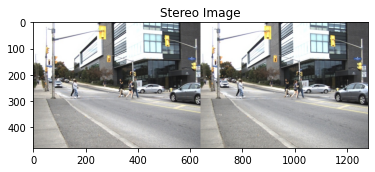

<Figure size 432x288 with 0 Axes>

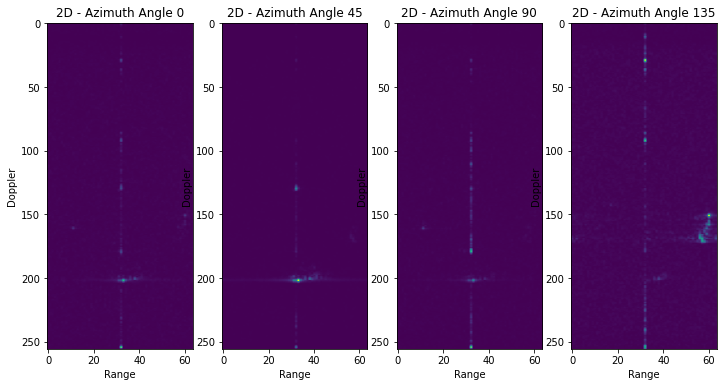

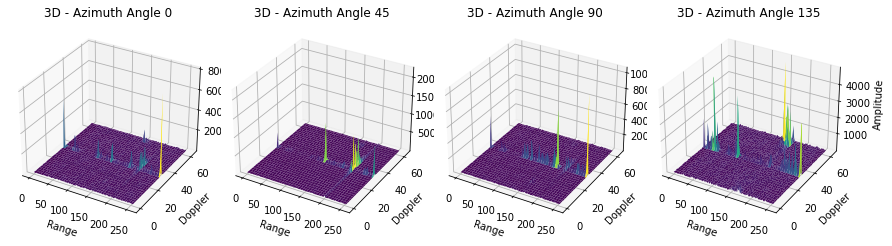

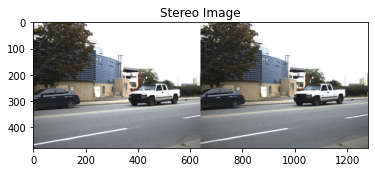

<Figure size 432x288 with 0 Axes>

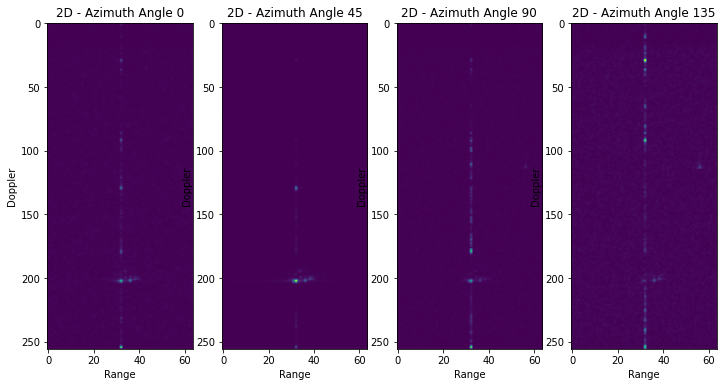

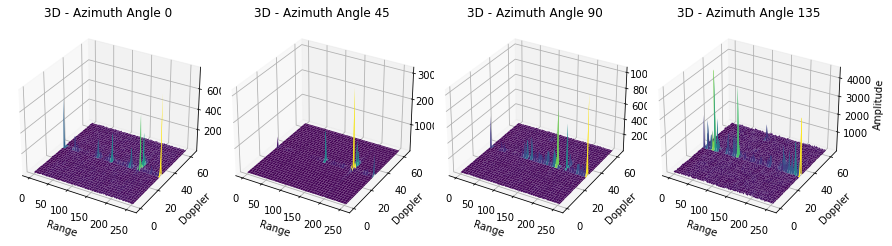

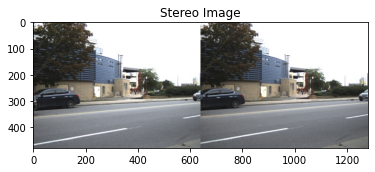

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import random
import cv2


folder_path = '/home/leshkar/Desktop/RADmain/train/RAD/part_1'
stereo_folder_path = '/home/leshkar/Desktop/RADmain/train/stereo_image/part_1'

all_files = os.listdir(folder_path)
npy_files = [file for file in all_files if file.endswith('.npy')]
file_names = [os.path.join(folder_path, file) for file in random.sample(npy_files, 3)]

azimuth_angles = [0, 45, 90, 135]

num_cols = 4
num_rows = (len(azimuth_angles) + num_cols - 1) // num_cols

for i, file_name in enumerate(file_names):
    radar_data = np.load(file_name)
    fig2d = plt.figure(figsize=(12, 6))
    fig3d = plt.figure(figsize=(12, 6))

    for j, azimuth_angle in enumerate(azimuth_angles):
        row = j // num_cols
        col = j % num_cols

        range_doppler_plane = np.abs(radar_data[:, azimuth_angle, :])

        ax2d = fig2d.add_subplot(num_rows, num_cols, j + 1)
        ax2d.imshow(range_doppler_plane, cmap='viridis', aspect='auto')
        ax2d.set_title(f'2D - Azimuth Angle {azimuth_angle}')
        ax2d.set_xlabel('Range')
        ax2d.set_ylabel('Doppler')

        ax3d = fig3d.add_subplot(num_rows, num_cols, j + 1, projection='3d')
        range_indices, doppler_indices = np.meshgrid(np.arange(256), np.arange(64))
        ax3d.plot_surface(range_indices, doppler_indices, range_doppler_plane.T, cmap='viridis')
        ax3d.set_title(f'3D - Azimuth Angle {azimuth_angle}')
        ax3d.set_xlabel('Range')
        ax3d.set_ylabel('Doppler')
        ax3d.set_zlabel('Amplitude')

    plt.tight_layout()

    stereo_image_name = os.path.basename(file_name).replace('.npy', '.jpg')
    stereo_image_path = os.path.join(stereo_folder_path, stereo_image_name)
    stereo_image = cv2.imread(stereo_image_path)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(stereo_image, cv2.COLOR_BGR2RGB))
    plt.title('Stereo Image')
    
    plt.figure()
    plt.show()


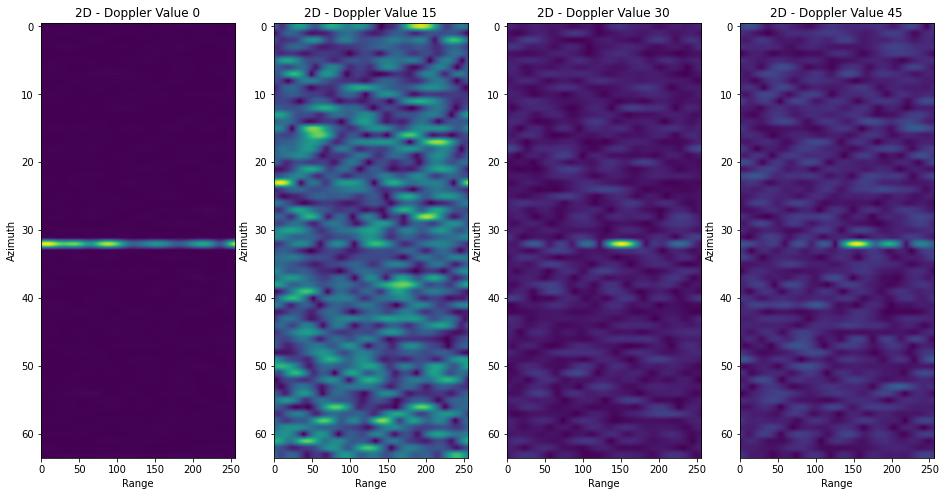

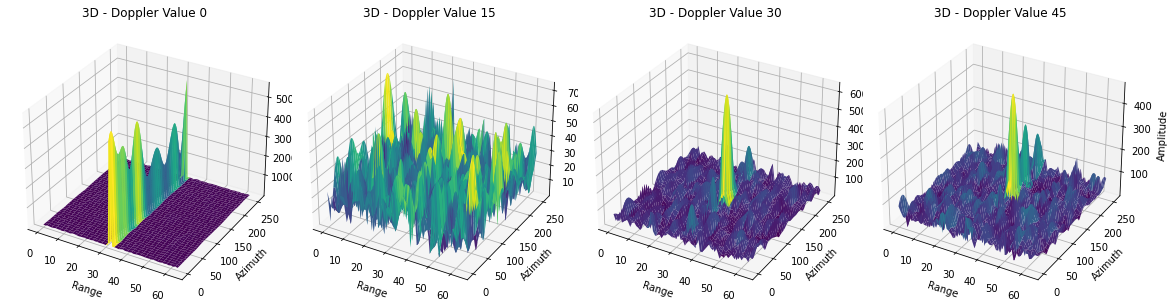

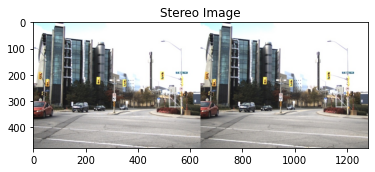

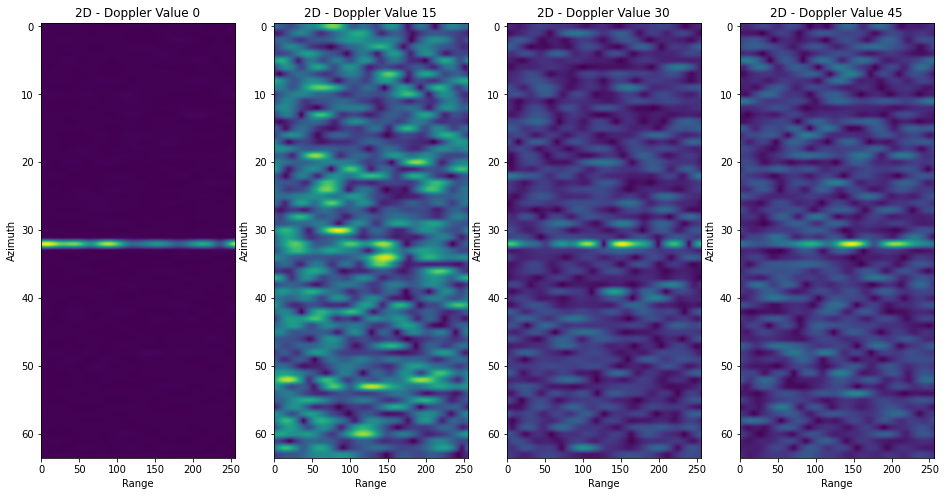

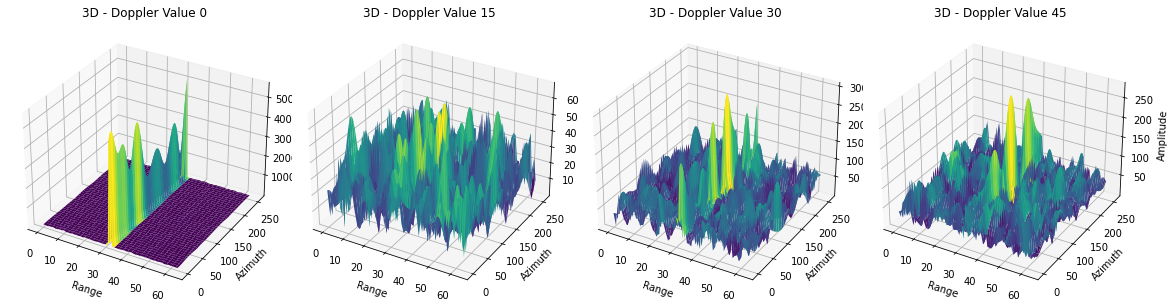

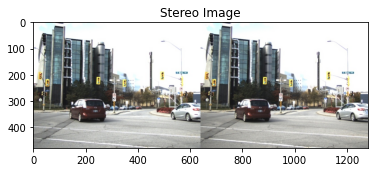

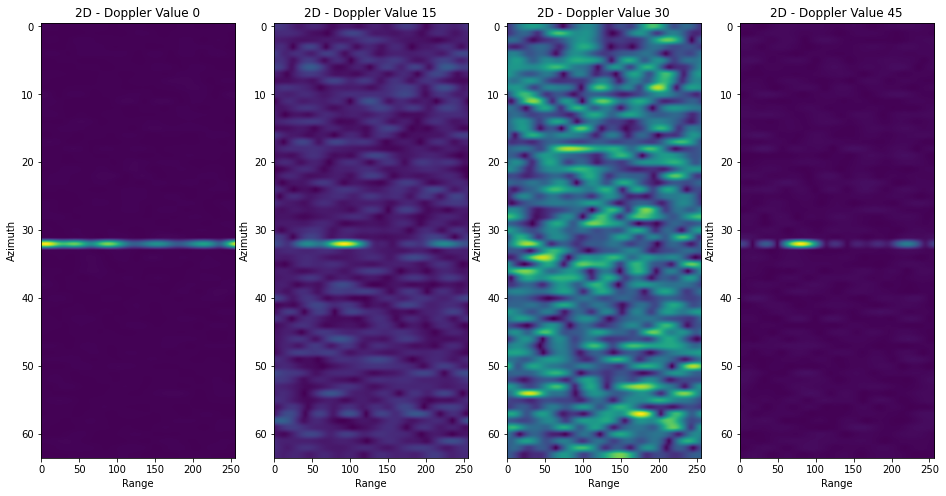

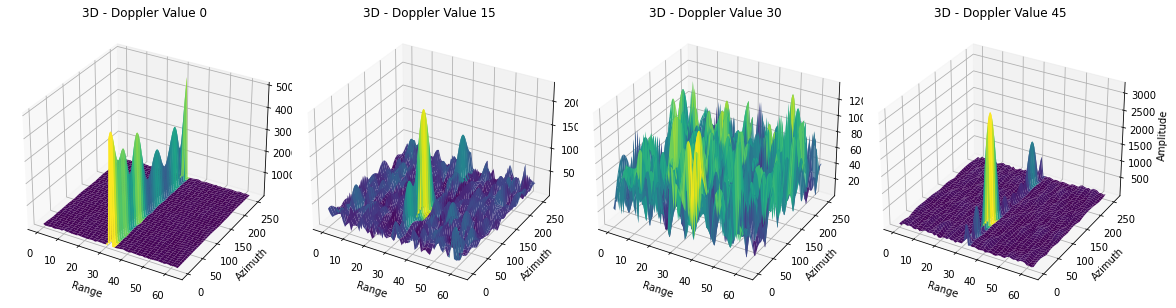

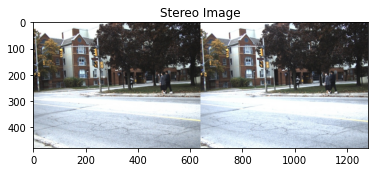

In [4]:
folder_path = '/home/leshkar/Desktop/RADmain/train/RAD/part_1'
stereo_folder_path = '/home/leshkar/Desktop/RADmain/train/stereo_image/part_1'

all_files = os.listdir(folder_path)
npy_files = [file for file in all_files if file.endswith('.npy')]
file_names = [os.path.join(folder_path, file) for file in random.sample(npy_files, 3)]

doppler_values = [0, 15, 30, 45]  

num_cols = 4
num_rows = (len(doppler_values) + num_cols - 1) // num_cols

for file_name in file_names:
    radar_data = np.load(file_name)
    
    fig2d = plt.figure(figsize=(16, 8))
    fig3d = plt.figure(figsize=(16, 8))

    for i, doppler_value in enumerate(doppler_values):
        range_azimuth_plane = np.abs(radar_data[doppler_value, :, :]).T

        ax2d = fig2d.add_subplot(num_rows, num_cols, i + 1)
        ax2d.imshow(range_azimuth_plane, cmap='viridis', aspect='auto')
        ax2d.set_title(f'2D - Doppler Value {doppler_value}')
        ax2d.set_xlabel('Range')
        ax2d.set_ylabel('Azimuth')

        ax3d = fig3d.add_subplot(num_rows, num_cols, i + 1, projection='3d')
        azimuth_indices, range_indices = np.meshgrid(np.arange(range_azimuth_plane.shape[1]), 
                                                     np.arange(range_azimuth_plane.shape[0]))
        ax3d.plot_surface(range_indices, azimuth_indices, range_azimuth_plane, cmap='viridis')
        ax3d.set_title(f'3D - Doppler Value {doppler_value}')
        ax3d.set_xlabel('Range')
        ax3d.set_ylabel('Azimuth')
        ax3d.set_zlabel('Amplitude')

    plt.tight_layout()

    stereo_image_name = os.path.basename(file_name).replace('.npy', '.jpg')
    stereo_image_path = os.path.join(stereo_folder_path, stereo_image_name)
    stereo_image = cv2.imread(stereo_image_path)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(stereo_image, cv2.COLOR_BGR2RGB))
    plt.title('Stereo Image')
    plt.show()
